In [9]:
import matplotlib.pyplot as plt
import pandas 
import math
import numpy as np
import random
from numpy import linalg
from numpy import matrix
import time
%matplotlib inline

In [10]:
#alpha = 0.2
alphas = np.arange(0,0.5,0.01)
performance = []
start_time = time.time()


profile = [0] * 10
import tqdm
def extract_features(features_string):
    return np.matrix(map(lambda x: float(x.split(':')[1]), features_string.split(' ')[1:6]))

for alpha in alphas:
    data = open('data10')
    user_articles = [''] * 20
    payoff_for_user = [0.] * 20
    sum_reward_of_alg = 0.
    sum_reward_of_data = 0.
    matrix_A = {}
    inversed_matrix_A = {}
    vector_b = {}
    payoff = {}
    tetas = {}

    try:
        for line in tqdm.tqdm(data):
            splitted = line.split('|')
            info = map(int, splitted[0].split(' ')[0:3])
            user = splitted[1]
            sum_reward_of_data = sum_reward_of_data + info[2]
            user_features = extract_features(user)
            st = time.clock()
            profile[0] += st - time.clock()  
            for i in xrange(20):
                st = time.clock()
                article = int(splitted[i + 2].split(' ')[0])
                user_articles[i] = article 

                if article not in matrix_A:
                    matrix_A[article] = np.matrix(np.identity(5))
                    inversed_matrix_A[article] = np.matrix(np.identity(5))
                    vector_b[article] = np.matrix(np.zeros(5))
                    tetas[article] = np.matrix(np.zeros(5)).T



                inverse_matrix = inversed_matrix_A[article] #np.ndarray


                teta = tetas[article]


                payoff[article] = teta.T * user_features.T  + alpha * math.sqrt(user_features * inverse_matrix  * user_features.T)
                payoff_for_user[i] = (float(payoff[article]))

            profile[1] += st - time.clock()
            st = time.clock()

            winner = np.argwhere(payoff_for_user == np.amax(payoff_for_user))
            chose_article = user_articles[random.choice(map(int, winner))]
            #print 'chose', chose_article

            profile[2] += st - time.clock()
            st = time.clock()
            if chose_article == info[1]: #if no information about article it ignors
                real_payoff = info[2] #click information
                sum_reward_of_alg = sum_reward_of_alg + real_payoff
                A = matrix_A[chose_article]
                b = vector_b[chose_article]

                matrix_A_buf =  A + user_features.T * user_features
                matrix_A[chose_article] = matrix_A_buf
                inversed_matrix_A[chose_article] = matrix_A_buf.I
                tetas[chose_article] = inversed_matrix_A[chose_article] * vector_b[chose_article].T
                vector_b[chose_article] = b + real_payoff * user_features
                profile[4] += st - time.clock()
                st = time.clock()
            else:
                #print 'No information about payoff of', chose_article
                pass

            profile[3] += st - time.clock()
            st = time.clock()




        data.close()
        performance.append(sum_reward_of_alg/sum_reward_of_data)
        print("--- %s seconds ---" % (time.time() - start_time))
    except KeyboardInterrupt:
        print "Interrupted"
        print profile

3770122it [41:30, 1514.08it/s]
323it [00:00, 1602.61it/s]

--- 2490.04475403 seconds ---


3770122it [47:19, 1327.93it/s]
153it [00:00, 1523.72it/s]

--- 5329.15150809 seconds ---


3770122it [39:31, 1589.84it/s]
295it [00:00, 1461.57it/s]

--- 7700.54402804 seconds ---


3770122it [39:33, 1588.37it/s]
314it [00:00, 1540.06it/s]

--- 10074.1309299 seconds ---


3770122it [39:43, 1581.58it/s]
310it [00:00, 1534.50it/s]

--- 12457.9003699 seconds ---


3770122it [39:53, 1575.21it/s]
306it [00:00, 1536.84it/s]

--- 14851.3097589 seconds ---


3770122it [39:46, 1579.94it/s]
313it [00:00, 1558.71it/s]

--- 17237.550627 seconds ---


3770122it [39:27, 1592.39it/s]
305it [00:00, 1514.15it/s]

--- 19605.1463239 seconds ---


3770122it [40:10, 1563.87it/s]
112it [00:00, 1112.43it/s]

--- 22015.913702 seconds ---


3770122it [40:28, 1552.64it/s]
302it [00:00, 1483.93it/s]

--- 24444.111501 seconds ---


3770122it [39:43, 1581.43it/s]
319it [00:00, 1551.76it/s]

--- 26828.112335 seconds ---


3770122it [39:05, 1607.39it/s]
317it [00:00, 1561.61it/s]

--- 29173.603725 seconds ---


3770122it [39:58, 1572.07it/s]
102it [00:00, 1012.98it/s]

--- 31571.792654 seconds ---


3770122it [39:43, 1581.95it/s]
329it [00:00, 1645.78it/s]

--- 33954.999362 seconds ---


3770122it [39:36, 1586.15it/s]
305it [00:00, 1516.73it/s]

--- 36331.9016409 seconds ---


3770122it [39:47, 1579.11it/s]
316it [00:00, 1598.41it/s]

--- 38719.40048 seconds ---


3770122it [39:34, 1587.86it/s]
154it [00:00, 1535.72it/s]

--- 41093.7406731 seconds ---


3770122it [39:44, 1580.95it/s]
158it [00:00, 1576.52it/s]

--- 43478.458878 seconds ---


3770122it [39:19, 1598.11it/s]
305it [00:00, 1494.03it/s]

--- 45837.5800109 seconds ---


3770122it [39:26, 1593.32it/s]
308it [00:00, 1540.85it/s]

--- 48203.7828369 seconds ---


3770122it [39:22, 1595.76it/s]
157it [00:00, 1562.73it/s]

--- 50566.3730471 seconds ---


3770122it [39:20, 1597.24it/s]
303it [00:00, 1516.77it/s]

--- 52926.778873 seconds ---


3770122it [39:17, 1598.92it/s]
319it [00:00, 1589.46it/s]

--- 55284.7001951 seconds ---


3770122it [39:49, 1577.73it/s]
307it [00:00, 1521.88it/s]

--- 57674.2883849 seconds ---


3770122it [39:57, 1572.63it/s]
106it [00:00, 1054.77it/s]

--- 60071.6310451 seconds ---


3770122it [39:37, 1585.53it/s]
161it [00:00, 1605.28it/s]

--- 62449.4586689 seconds ---


3770122it [38:05, 1649.90it/s]
158it [00:00, 1575.98it/s]

--- 64734.5250189 seconds ---


3770122it [39:23, 1595.47it/s]
320it [00:00, 1580.74it/s]

--- 67097.539072 seconds ---


3770122it [39:44, 1581.23it/s]
325it [00:00, 1580.19it/s]

--- 69481.839788 seconds ---


3770122it [39:45, 1580.15it/s]
302it [00:00, 1485.37it/s]

--- 71867.7636981 seconds ---


3770122it [39:58, 1572.13it/s]
304it [00:00, 1502.31it/s]

--- 74265.866447 seconds ---


3770122it [39:58, 1571.56it/s]
314it [00:00, 1554.48it/s]

--- 76664.8359549 seconds ---


3770122it [39:34, 1587.80it/s]
315it [00:00, 1604.51it/s]

--- 79039.261862 seconds ---


3770122it [39:38, 1585.34it/s]
310it [00:00, 1518.30it/s]

--- 81417.384311 seconds ---


3770122it [39:58, 1571.70it/s]
305it [00:00, 1481.58it/s]

--- 83816.134788 seconds ---


3770122it [40:02, 1569.23it/s]
308it [00:00, 1518.97it/s]

--- 86218.671438 seconds ---


3770122it [40:19, 1558.39it/s]
307it [00:00, 1525.10it/s]

--- 88637.913713 seconds ---


3770122it [40:10, 1563.99it/s]
305it [00:00, 1503.97it/s]

--- 91048.4983251 seconds ---


3770122it [39:46, 1579.64it/s]
317it [00:00, 1546.45it/s]

--- 93435.2024739 seconds ---


3770122it [39:33, 1588.37it/s]
317it [00:00, 1567.01it/s]

--- 95808.783967 seconds ---


234709it [02:27, 1631.11it/s]

ValueError: I/O operation on closed file

[0.06304074022242893, 0.06153428220980103, 0.06204466689167497, 0.06593840809371321, 0.06903364422894868, 0.06419322176214427, 0.06625122451163595, 0.06650641685257291, 0.07379174658577344, 0.06662166500654444, 0.07442561143261688, 0.07002971755970266, 0.0733801460358751, 0.07443384344361484, 0.07312495369493814, 0.06988154136173926, 0.07189015204524313, 0.07006264560369453, 0.07136330334137327, 0.06991446940573112, 0.0691818204269121, 0.0713550713303753, 0.07123982317640376, 0.07328959391489746, 0.07469726779554978, 0.07248285683709674, 0.0736271063658141, 0.07243346477110893, 0.07186545601224924, 0.0706141903405583, 0.0740963309926982, 0.07247462482609877, 0.07146208747334887, 0.07450793154259654, 0.07352009022284053, 0.0738246746297653, 0.07189015204524313, 0.07270512113404183, 0.0731084896729422, 0.07205479226520246]


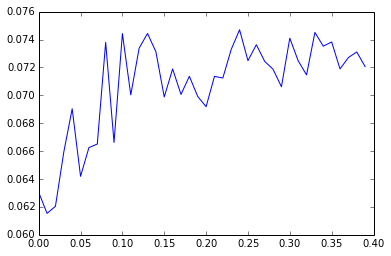

In [15]:
alphas = np.arange(0., 0.40, 0.01)
plt.plot(alphas, performance)
print performance

In [16]:
performance1 = [0.07203009623220856, 0.07138799937436717, 0.07262280102406217, 0.07082822262650543, 0.07451616355359451, 0.0725651769470764, 0.07257340895807436, 0.0722194324851618, 0.0726886571120459, 0.07221120047416384,]
alpha = alphas = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]

[0.0, 0.5, 0.05, 0.075]

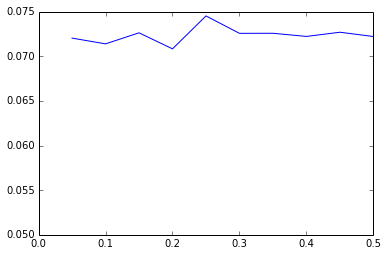

In [18]:
plt.plot(alphas, performance1)
plt.axis([0.0, 0.5, 0.050, 0.075])